# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

В качестве набора данных буду использовать набор данных
по твитам самого известного спортсмена в мире - Криштиану Роналду - https://www.kaggle.com/datasets/kanchana1990/ronaldos-tweets-insight-engagement-and-trends?resource=download

Этот датасет, насчитывающий около 800 записей, предлагает полный обзор взаимодействия Роналду, его участия и моментов, которыми он поделился с его обширной глобальной аудиторией. На основе даных представленных в этом датасете, можно определить влияние постов известной мировой звезды на общественность.

Датасет представлен в виде csv файла:
- cr_tweets.csv - обучающая выборка

Файл содержит следующие столбцы:
- id: уникальный идентификатор для каждого твита.
- createdAt: временная метка твита.
- text: Содержание твита.
- retweetCount: количество ретвитов.
- replyCount: Количество ответов.
- likeCount: Количество лайков.
- quoteCount: Количество цитат.
- bookmarkCount: количество закладок.

# Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.

Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [8]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('/content/drive/My Drive/cr_tweets.csv', sep=",")

# 2) Основные характеристики датасета

In [9]:
# Первые 5 строк датасета
data.head()

,id,createdAt,text,retweetCount,replyCount,likeCount,quoteCount,bookmarkCount
0,1750522838283649232,Thu Jan 25 14:15:42 +0000 2024,"Had an amazing time with @Binance, creating th...",5657,3676,50466,141,186
1,1740707339588825311,Fri Dec 29 12:12:25 +0000 2023,With the best fireworks show in the world - me...,9365,8766,99551,310,364
2,1736824246070890705,Mon Dec 18 19:02:23 +0000 2023,Great memory with my SIXPAD family from the Co...,11088,6263,130247,374,753
3,1736404837649023475,Sun Dec 17 15:15:48 +0000 2023,Grateful to be honored as the most searched at...,21526,7213,194912,1372,1186
4,1732473555923644630,Wed Dec 06 18:54:18 +0000 2023,Funchal is the capital and tourist centre of M...,14517,6903,165795,404,766


In [10]:
# Размер датасета - 794 строки, 8 колонок
data.shape

(794, 8)

In [11]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 794


In [12]:
# Список колонок
data.columns

Index(['id', 'createdAt', 'text', 'retweetCount', 'replyCount', 'likeCount',
       'quoteCount', 'bookmarkCount'],
      dtype='object')

In [13]:
# Список колонок с типами данных
data.dtypes

id                int64
createdAt        object
text             object
retweetCount      int64
replyCount        int64
likeCount         int64
quoteCount        int64
bookmarkCount     int64
dtype: object

In [14]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

id - 0
createdAt - 0
text - 0
retweetCount - 0
replyCount - 0
likeCount - 0
quoteCount - 0
bookmarkCount - 0


In [15]:
# Основные статистические характеристки набора данных
data.describe()

,id,retweetCount,replyCount,likeCount,quoteCount,bookmarkCount
count,7.940000e+02,794.000000,794.000000,7.940000e+02,794.000000,794.000000
mean,1.353613e+18,16123.518892,4108.187657,2.286709e+05,1339.972292,226.366499
std,2.193958e+17,16278.693062,4701.948795,1.875900e+05,2525.714679,386.663740
min,1.025345e+18,641.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.150906e+18,7256.000000,1677.250000,1.103700e+05,321.250000,47.250000
50%,1.335894e+18,12257.000000,2874.500000,1.881000e+05,714.000000,108.500000
75%,1.564559e+18,19413.250000,4974.250000,2.898265e+05,1492.500000,243.000000
max,1.750523e+18,205977.000000,87073.000000,1.934781e+06,48222.000000,5572.000000


In [19]:
# Определим уникальные значения для целевого признака
data['likeCount'].unique()

array([  50466,   99551,  130247,  194912,  165795,  226493,  453283,
        748433,  407454,  421988,  388857,  472028,  409280,  526148,
        423853,  501370,  546764,  522024,  473632,  508630,  371325,
        302692,  403207,  509610,  498785,  151388,  706774,  628624,
        376118,  372655,  173084,  560679,  160262,  544634,  419445,
        494671,  457095,       0,  817975,  497146,  191582,  405929,
         57842,  124596,  422136,  202389,  423929,  378819,  153729,
        750358,  990235,  125519,  459038,  151944,   97256,  454989,
        489818,  320821,  443517,  302200,  374922,  107906,  100091,
          9605,  298311,  100240,  359923,  102612,    7688,  134348,
         88547,  100501,   66739,  100984,   79545,  308899,  122456,
        153187,  111096,  351158,   89853,   81195,  235690,  171055,
        308126,   40847,  582738,  194070,  234276,  521623,  283836,
        236956,   66831,  260879,  100872,  353695,  262201,  266513,
        119974,  146

# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<Axes: xlabel='replyCount', ylabel='retweetCount'>

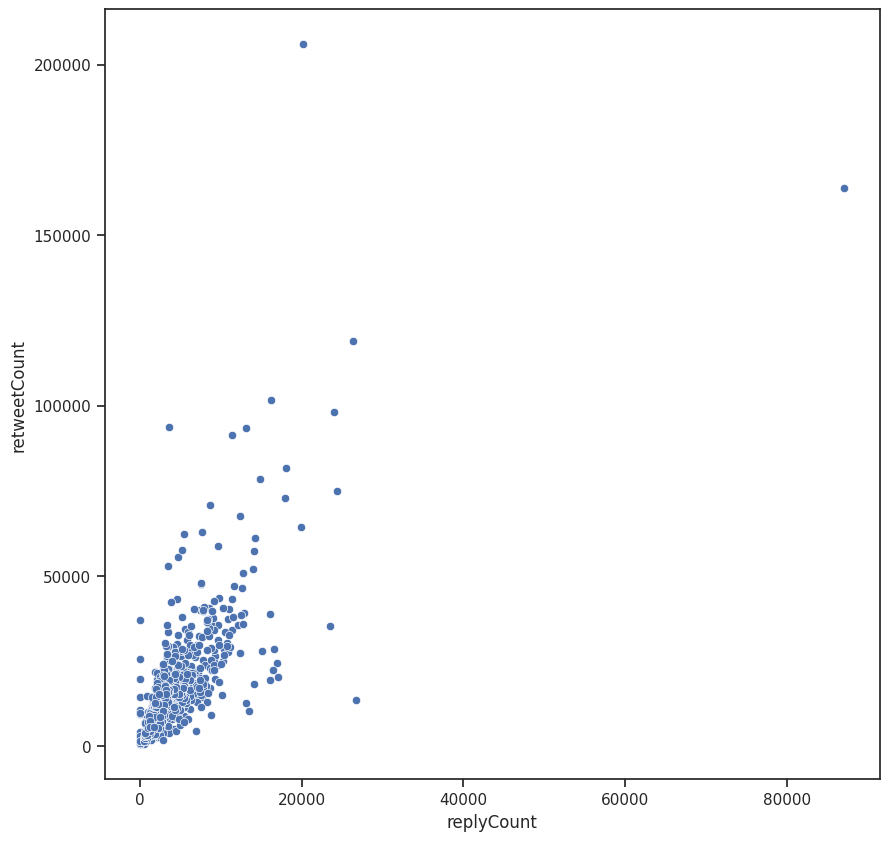

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='replyCount', y='retweetCount', data=data)

Можно видеть что между полями replyCount и retweetCount пристутствует почти линейная зависимость.

Посмотрим насколько на эту зависимость влияет целевой признак.

<Axes: xlabel='replyCount', ylabel='retweetCount'>

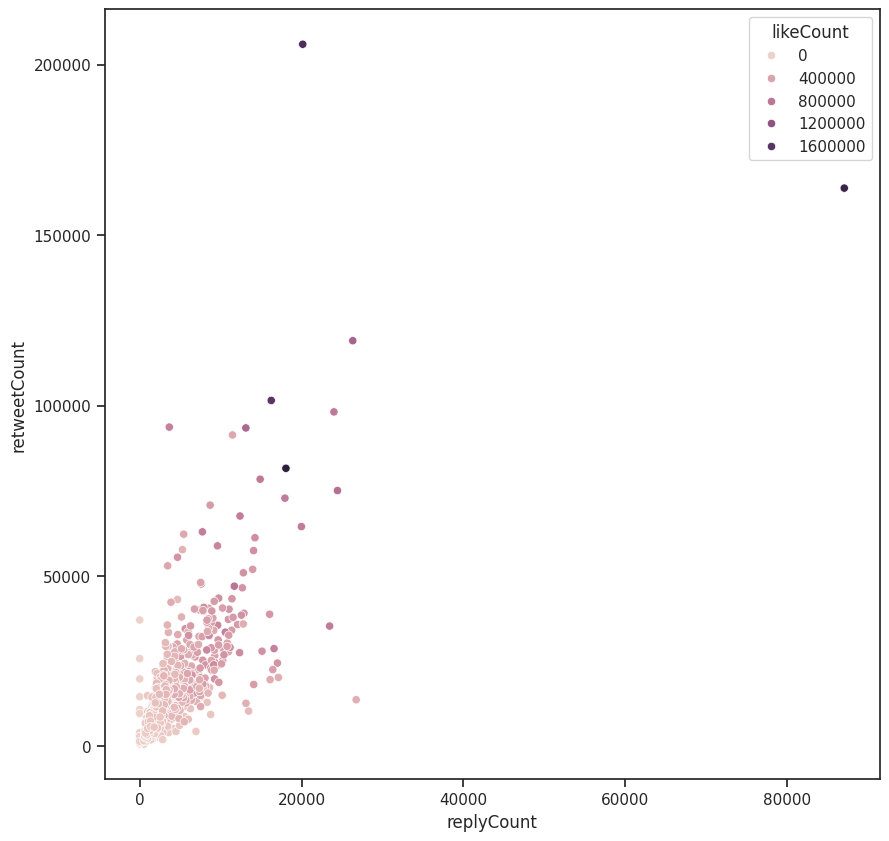

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='replyCount', y='retweetCount', data=data, hue='likeCount')

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram)
Позволяет оценить плотность вероятности распределения данных.

<ipython-input-25-ca2610d27f25>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['retweetCount'])


<Axes: xlabel='retweetCount', ylabel='Density'>

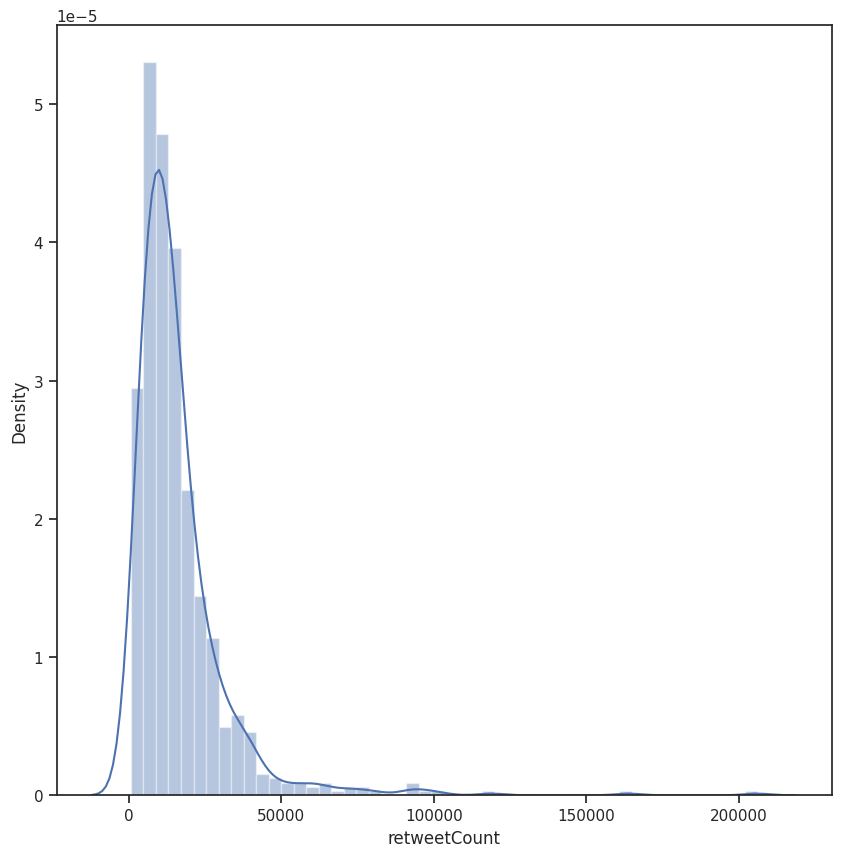

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(data['retweetCount'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

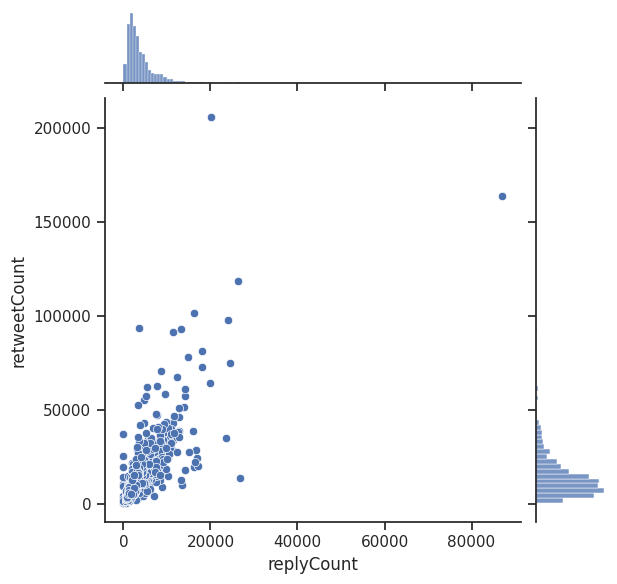

In [26]:
sns.jointplot(x='replyCount', y='retweetCount', data=data)

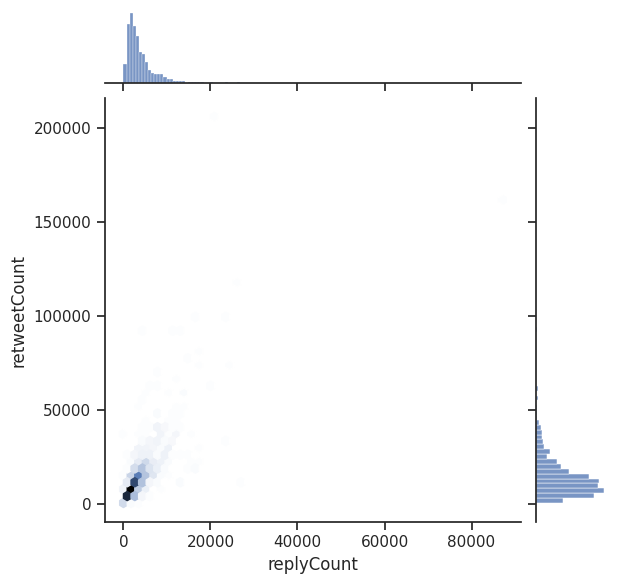

In [27]:
sns.jointplot(x='replyCount', y='retweetCount', data=data, kind="hex")

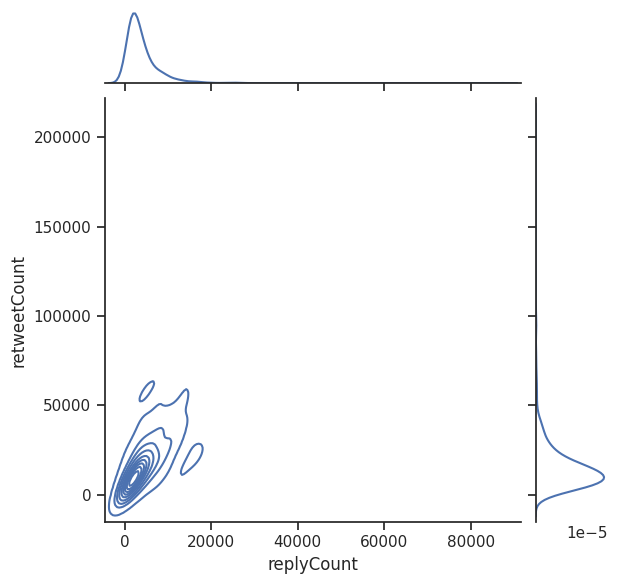

In [28]:
sns.jointplot(x='replyCount', y='retweetCount', data=data, kind="kde")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

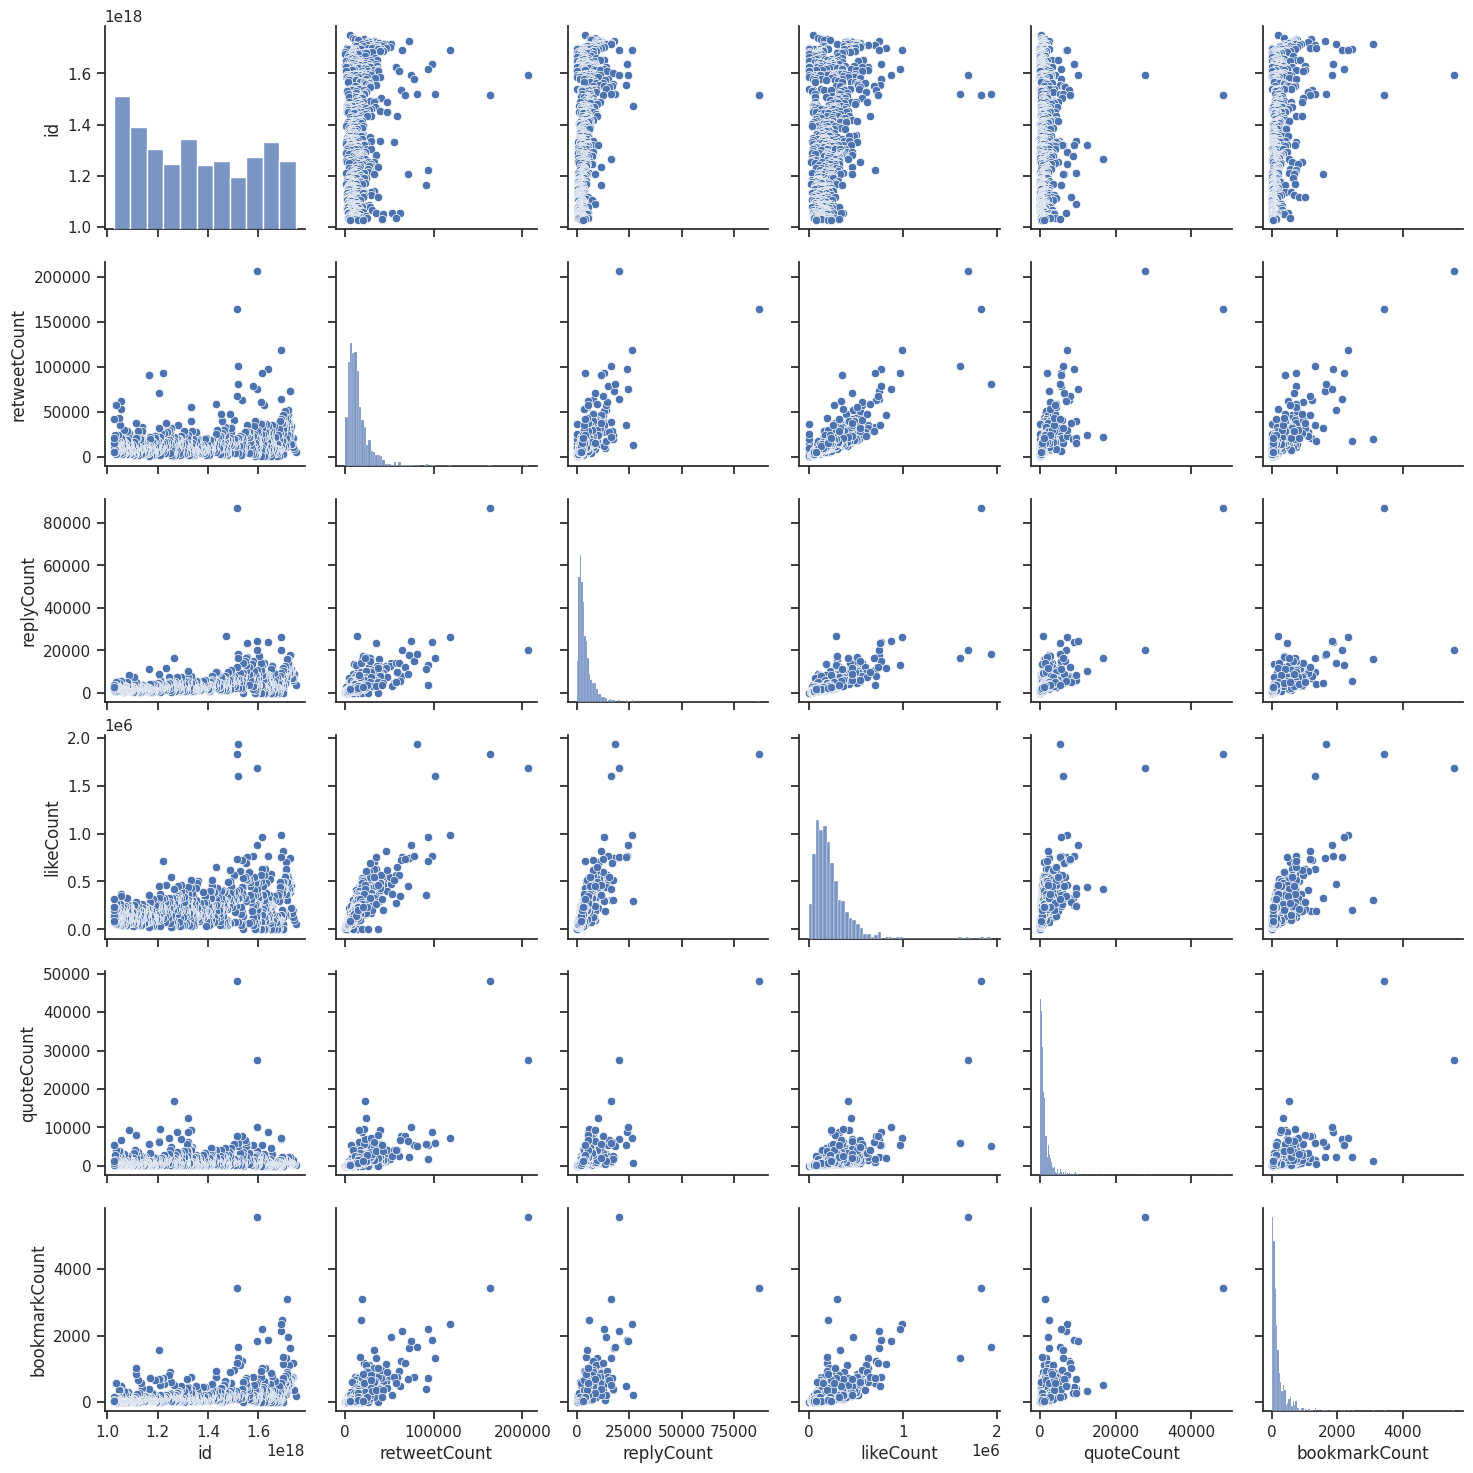

In [29]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

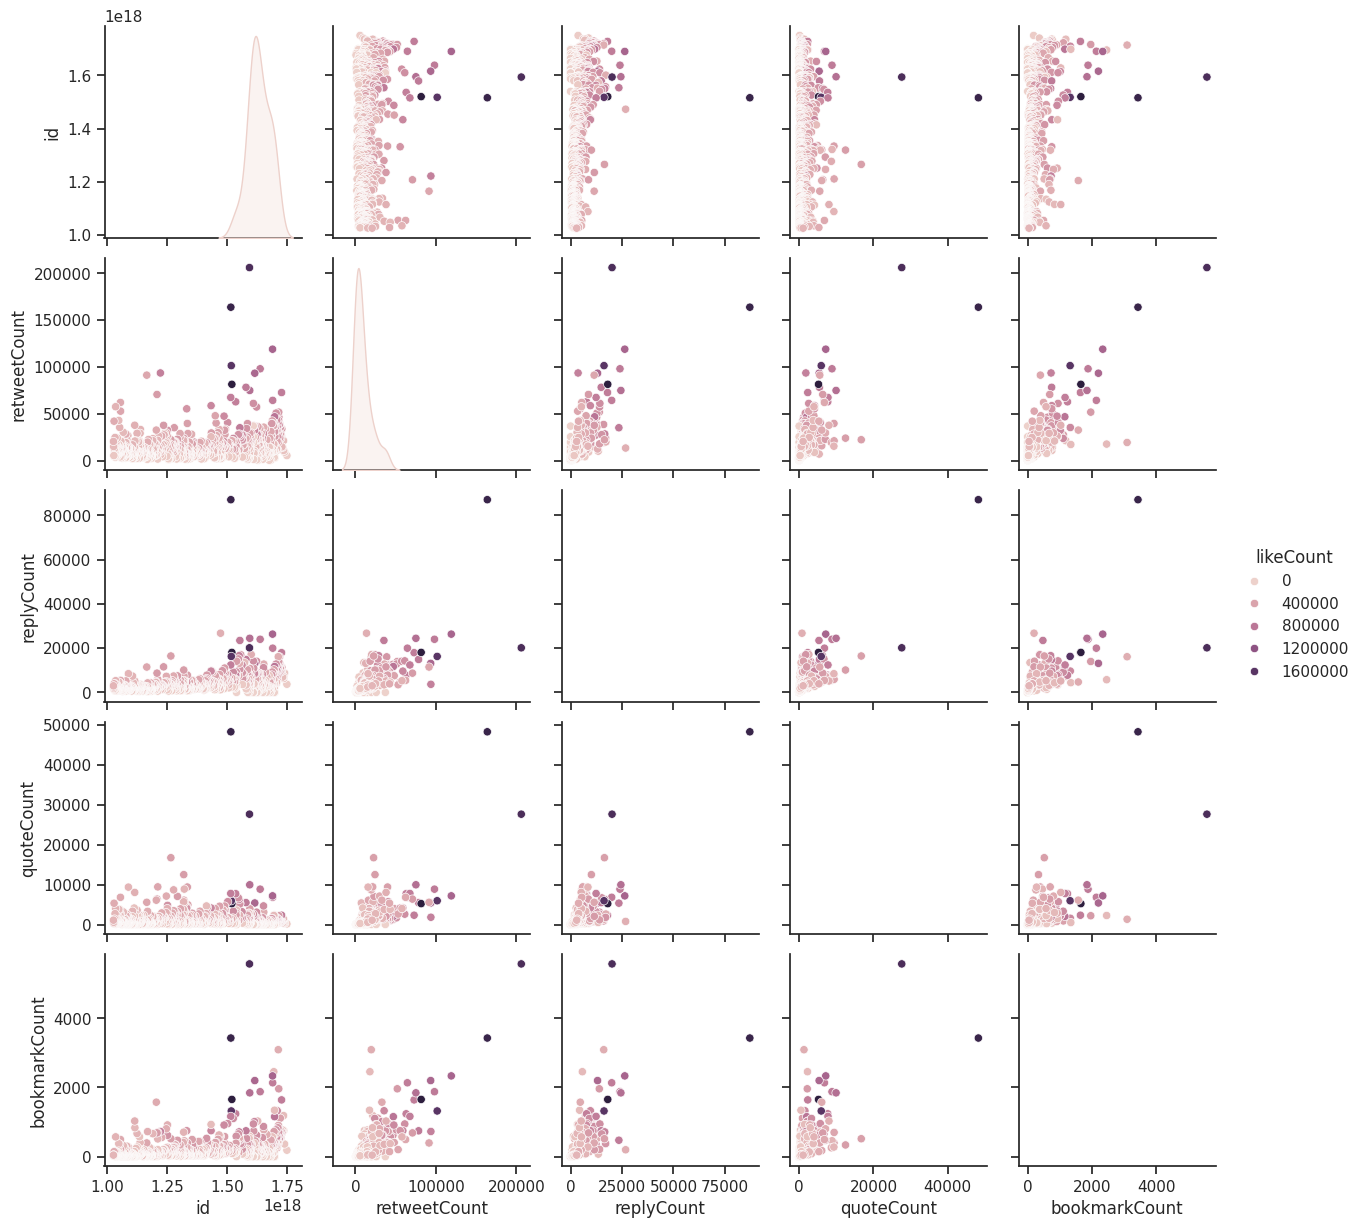

In [30]:
sns.pairplot(data, hue="likeCount")

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

<Axes: xlabel='retweetCount'>

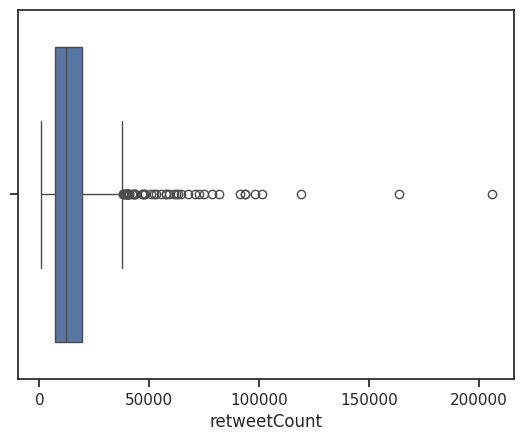

In [31]:
sns.boxplot(x=data['retweetCount'])

<Axes: ylabel='retweetCount'>

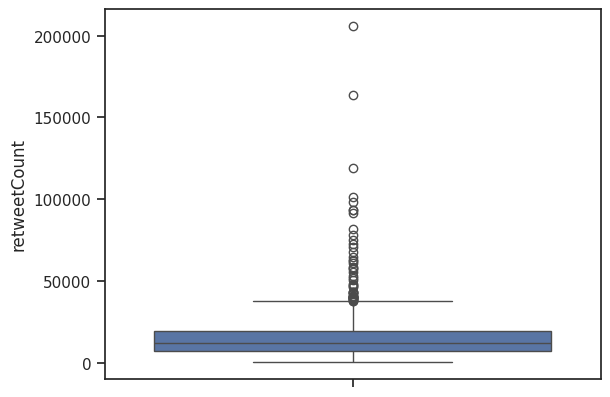

In [32]:
# По вертикали
sns.boxplot(y=data['retweetCount'])

<Axes: xlabel='retweetCount', ylabel='likeCount'>

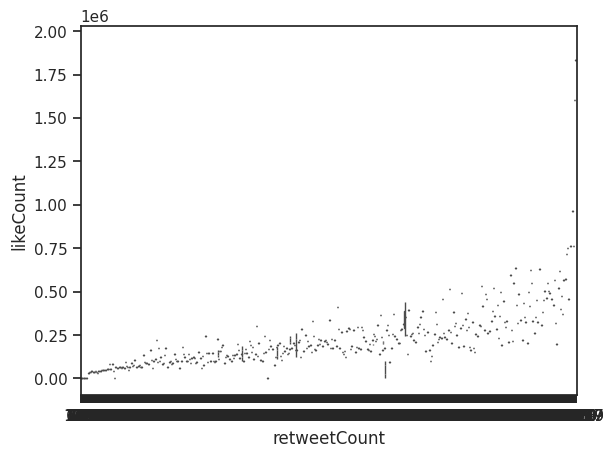

In [41]:
# Распределение параметра likeCount сгруппированные по retweetCount.
sns.boxplot(x='retweetCount', y='likeCount', data=data)

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

<Axes: xlabel='retweetCount'>

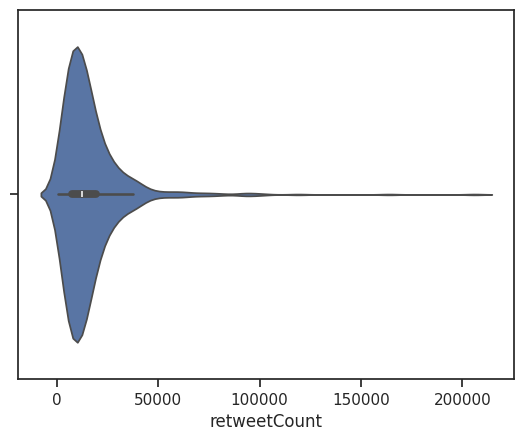

In [35]:
sns.violinplot(x=data['retweetCount'])

<ipython-input-37-fe2db145e04b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['retweetCount'], ax=ax[1])


<Axes: xlabel='retweetCount', ylabel='Density'>

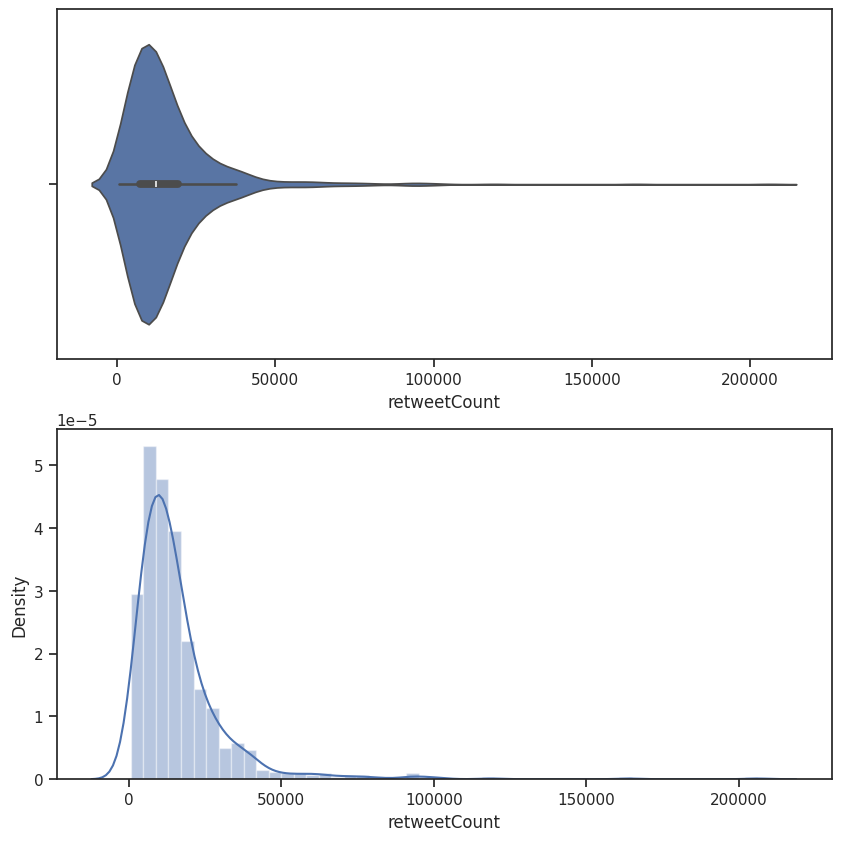

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['retweetCount'])
sns.distplot(data['retweetCount'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<Axes: xlabel='retweetCount', ylabel='likeCount'>

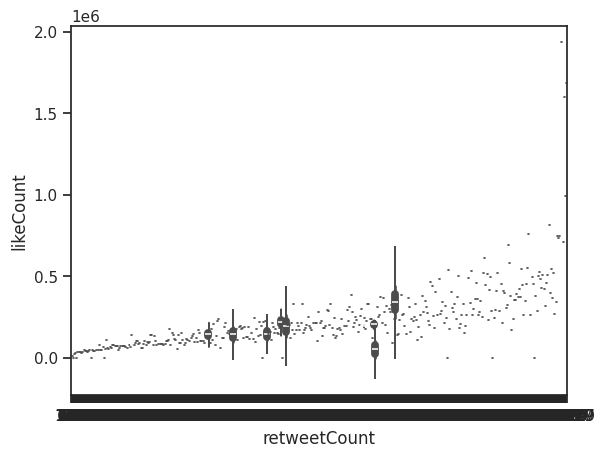

In [40]:
# Распределение параметра likeCount сгруппированные по retweetCount.
sns.violinplot(x='retweetCount', y='likeCount', data=data)

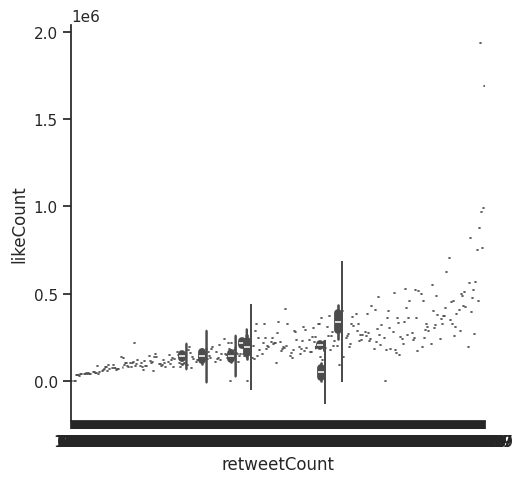

In [42]:
sns.catplot(y='likeCount', x='retweetCount', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "likeCount"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [43]:
data.corr()

<ipython-input-43-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,retweetCount,replyCount,likeCount,quoteCount,bookmarkCount
id,1.000000,0.255408,0.395516,0.328655,0.047010,0.356112
retweetCount,0.255408,1.000000,0.737088,0.851507,0.696943,0.795668
replyCount,0.395516,0.737088,1.000000,0.785929,0.752928,0.691463
likeCount,0.328655,0.851507,0.785929,1.000000,0.650450,0.724613
quoteCount,0.047010,0.696943,0.752928,0.650450,1.000000,0.662245
bookmarkCount,0.356112,0.795668,0.691463,0.724613,0.662245,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).


На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее сильно коррелирует с retweetCount (0.85), replyCount(0.79) и bookmarkCount (0.71). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с quoteCount (0.65). Этот признак стоит также оставить в модели.
- Так как признаки retweetCount и replyCount - линейнозависимые, то из них следут выбрать один. Выберем retweetCount, так как он сильнее коллериует с целевым признкаом.

Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [44]:
data.corr(method='pearson')

<ipython-input-44-c50c7eb58c83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,id,retweetCount,replyCount,likeCount,quoteCount,bookmarkCount
id,1.000000,0.255408,0.395516,0.328655,0.047010,0.356112
retweetCount,0.255408,1.000000,0.737088,0.851507,0.696943,0.795668
replyCount,0.395516,0.737088,1.000000,0.785929,0.752928,0.691463
likeCount,0.328655,0.851507,0.785929,1.000000,0.650450,0.724613
quoteCount,0.047010,0.696943,0.752928,0.650450,1.000000,0.662245
bookmarkCount,0.356112,0.795668,0.691463,0.724613,0.662245,1.000000


In [45]:
data.corr(method='kendall')

<ipython-input-45-eef8b96b14ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='kendall')


,id,retweetCount,replyCount,likeCount,quoteCount,bookmarkCount
id,1.000000,0.174302,0.361593,0.224675,0.027097,0.369779
retweetCount,0.174302,1.000000,0.630162,0.711398,0.600194,0.570577
replyCount,0.361593,0.630162,1.000000,0.702073,0.579400,0.661983
likeCount,0.224675,0.711398,0.702073,1.000000,0.622957,0.587104
quoteCount,0.027097,0.600194,0.579400,0.622957,1.000000,0.542709
bookmarkCount,0.369779,0.570577,0.661983,0.587104,0.542709,1.000000


In [47]:
data.corr(method='spearman')

<ipython-input-47-d276310a42d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='spearman')


,id,retweetCount,replyCount,likeCount,quoteCount,bookmarkCount
id,1.000000,0.258457,0.510459,0.315553,0.039339,0.515981
retweetCount,0.258457,1.000000,0.813072,0.873712,0.788196,0.758910
replyCount,0.510459,0.813072,1.000000,0.869272,0.771452,0.844687
likeCount,0.315553,0.873712,0.869272,1.000000,0.811635,0.759657
quoteCount,0.039339,0.788196,0.771452,0.811635,1.000000,0.727497
bookmarkCount,0.515981,0.758910,0.844687,0.759657,0.727497,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

<ipython-input-48-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

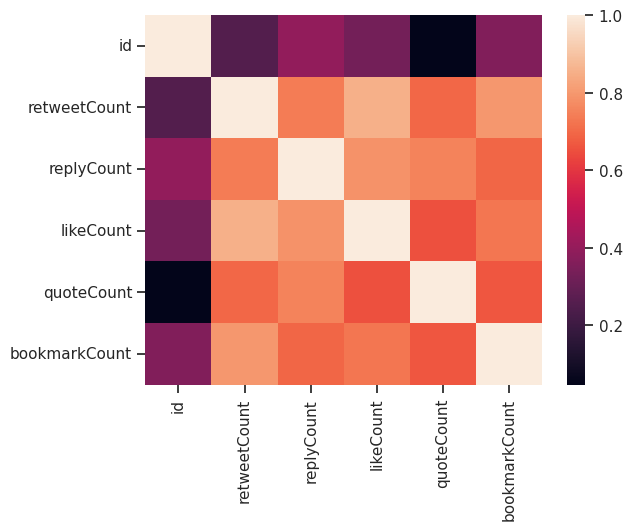

In [48]:
sns.heatmap(data.corr())

<ipython-input-49-e5b8b9424929>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.3f')


<Axes: >

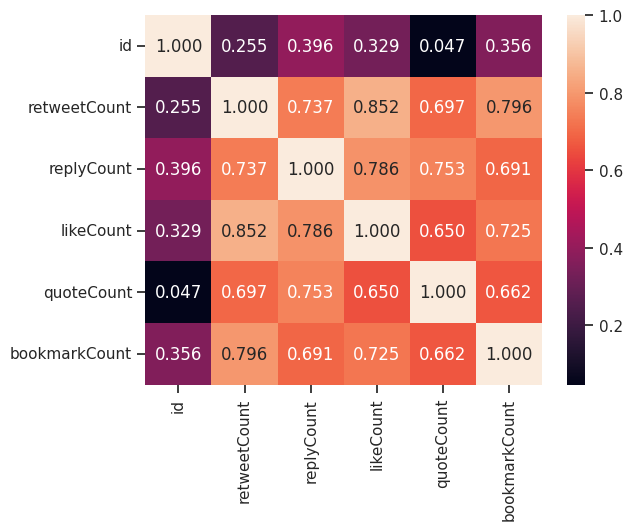

In [49]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

<ipython-input-50-159a10fbe111>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')


<Axes: >

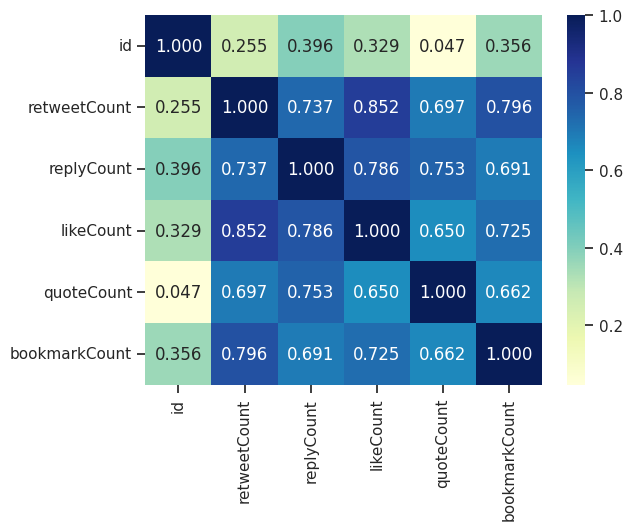

In [50]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<ipython-input-52-9bd3780f123f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(data.corr(), dtype=np.bool_)
<ipython-input-52-9bd3780f123f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')


<Axes: >

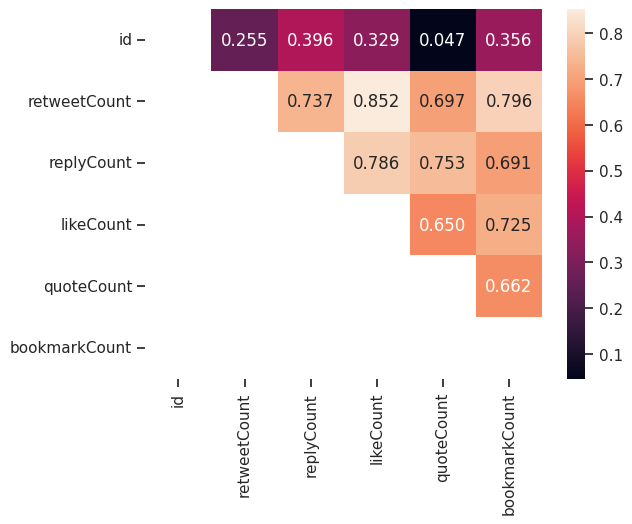

In [52]:
# Треугольный вариант матрицы
correlation_matrix = data.corr(numeric_only=True)
mask = np.zeros_like(data.corr(), dtype=np.bool_)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

<ipython-input-53-08a6fe4f74a2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
<ipython-input-53-08a6fe4f74a2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
<ipython-input-53-08a6fe4f74a2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')


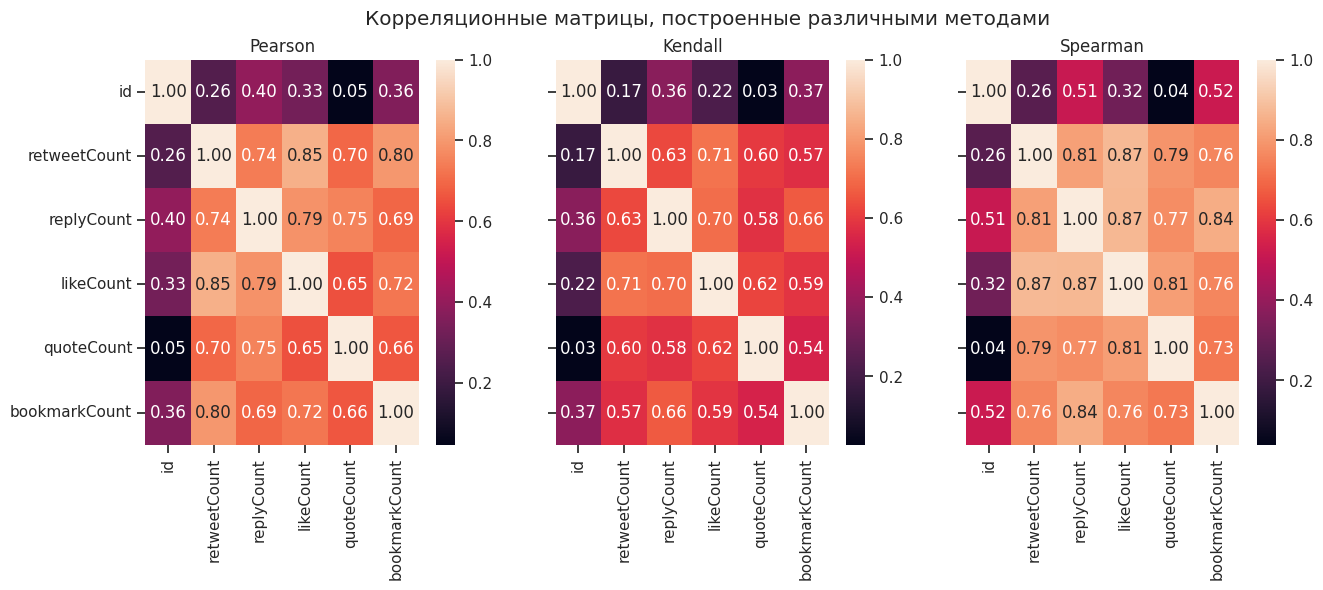

In [53]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

### Тепловая карта с указание размера

- Функция plt.subplots создает область окна нужного размера, в которую может выводиться график.
- Параметр figsize=(размер по горизонтали, размер по вертикали).
- По умолчанию размер задается в дюймах, но возможно использование и других единиц измерения - https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
- Функция sns.heatmap содержит параметр ax=ax, который ссылается на область, созданную plt.subplots, поэтому график выводится в данной области.

<ipython-input-54-ec5518be2541>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')


<Axes: >

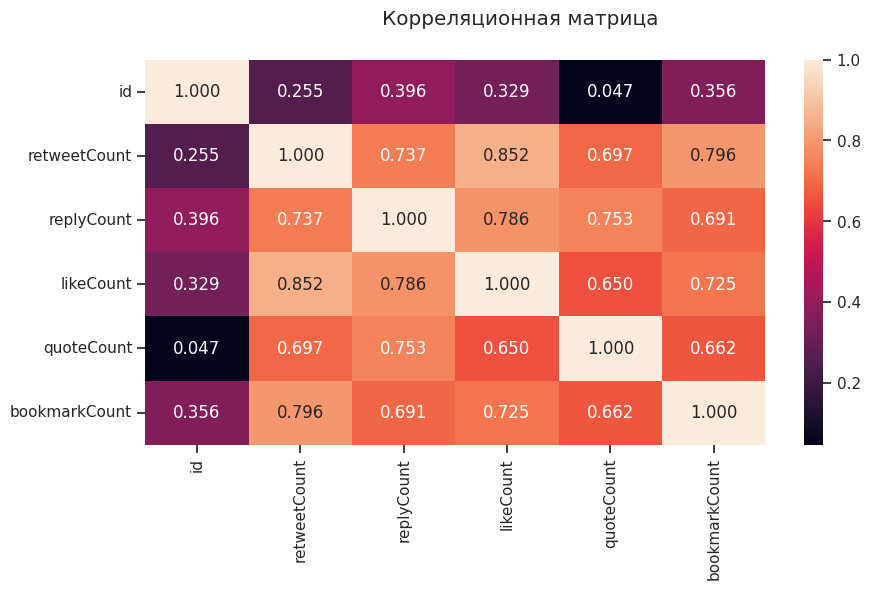

In [54]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками Humidity и HumidityRatio, следовательно только один из этих признаков можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из  двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" [Solar correlation map](https://github.com/Zapf-Consulting/solar-correlation-map).

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:
- https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
- https://www.mtab.com/the-puzzle-of-visualizing-correlations/

# Дополнительные ссылки на обучающие ноутбуки

[The Best Tutorial for Beginners (Kaggle)](https://www.kaggle.com/getting-started/71679)